In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('task1 - dataset - pol_regression(1).csv')

data

,Unnamed: 0,x,y
0,0,0.507979,2.238321
1,1,2.081478,-13.104269
2,2,-2.090953,-10.895881
3,3,0.108276,-1.580098
4,4,3.929470,9.174928
5,5,3.962931,3.237086
6,6,-3.744147,-72.556875
7,7,-2.927571,-29.934683
8,8,-4.485328,-125.275943
9,9,-0.591902,1.586948


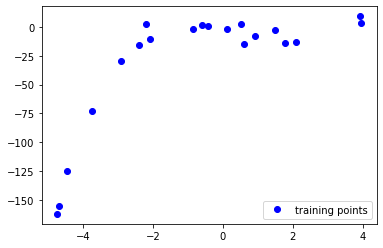

In [2]:
x_data = data['x']
y_data = data['y']

plt.clf()
plt.plot(x_data, y_data, 'bo')
plt.legend(('training points', 'ground truth'))
plt.show()

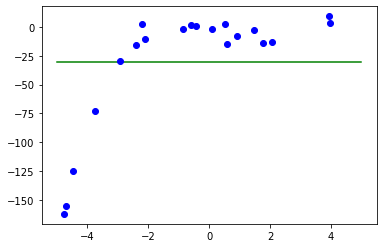

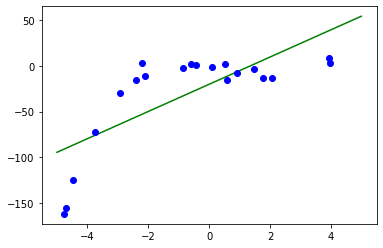

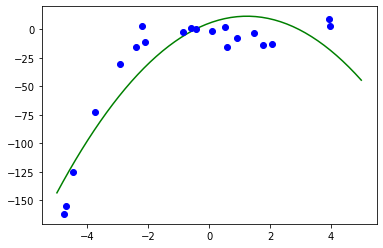

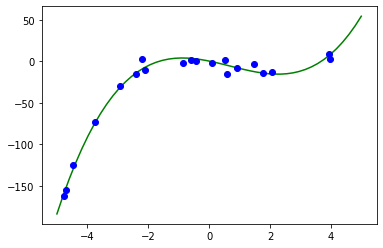

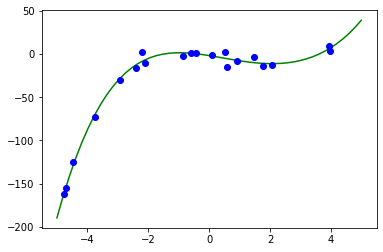

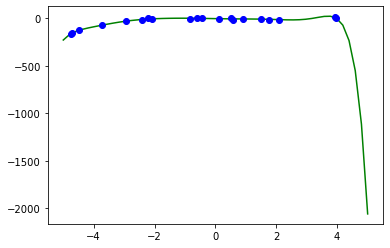

In [3]:
#1.2
import matplotlib.pyplot as plt
import numpy.linalg as linalg
#Sets up the data matrix
def data_matrix(x, degree):
    X = np.ones(x.shape)
    for i in range(1,degree + 1):
        X = np.column_stack((X, x ** i))
    return X
#Performs least squares polynomial regression    
def pol_regression(feature_data, y_train, degree):
    if degree == 0: #If the degree is 0 it performs a constant regression
        return [np.mean(y_train)]
    else:
        #Sets up data matrix
        X = data_matrix(feature_data, degree)
        #Performs least squares solution to find weights
        XX = X.transpose().dot(X)
        w = np.linalg.solve(XX, X.transpose().dot(y_train))
        return w 
    
def plotting(weights,degree):
    plt.figure()
    if degree == 0:
        plt.plot(np.linspace(-5,5), data_matrix(np.linspace(-5,5), degree)*weights,'g')
    else:
        plt.plot(np.linspace(-5,5), data_matrix(np.linspace(-5,5), degree).dot(weights),'g')
    plt.plot(x_data, y_data,'bo')

plotting(pol_regression(x_data, y_data,0),0)
plotting(pol_regression(x_data, y_data,1),1)
plotting(pol_regression(x_data, y_data,2),2)
plotting(pol_regression(x_data, y_data,3),3)
plotting(pol_regression(x_data, y_data,6),6)
plotting(pol_regression(x_data, y_data,10),10)

In [4]:
#Shuffles data with the test size 30% and train 70%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, train_size=0.7)
#1.3
def eval_pol_regression(parameters, x, y, degree):
    if degree == 0: # If the degree is 0 then we multiply the data matrix against the weights
        error = data_matrix(x, degree) * (parameters)
    else:#If the degree is higher than 0 then we use dot() to multiply the matrices
        error = data_matrix(x, degree).dot(parameters)
    RMSE = np.sqrt(np.mean(np.square(np.subtract(error, y)))) #Square the error rate, average it then square root to find RMSE
    return RMSE

print(eval_pol_regression(pol_regression(x_data, y_data,0), x_data, y_data, 0))
print(eval_pol_regression(pol_regression(x_data, y_data,1), x_data, y_data, 1))
print(eval_pol_regression(pol_regression(x_data, y_data,2), x_data, y_data, 2))
print(eval_pol_regression(pol_regression(x_data, y_data,3), x_data, y_data, 3))
print(eval_pol_regression(pol_regression(x_data, y_data,6), x_data, y_data, 6))
print(eval_pol_regression(pol_regression(x_data, y_data,10), x_data, y_data,10))

52.36086660324951
35.02106539156851
20.981419446080935
5.254699562089334
4.742478602104728
4.298818412248294


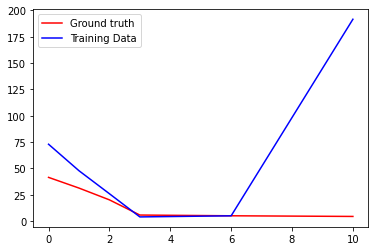

In [5]:
def evaluation(x, y, colour):
    plot0 = eval_pol_regression(weight0, x, y, 0)
    plot1 = eval_pol_regression(weight1, x, y, 1)
    plot2 = eval_pol_regression(weight2, x, y, 2)
    plot3 = eval_pol_regression(weight3, x, y, 3)
    plot6 = eval_pol_regression(weight6, x, y, 6)
    plot10 = eval_pol_regression(weight10, x, y, 10)
    plt.plot([0,1,2,3,6,10],[plot0,plot1,plot2,plot3,plot6,plot10],colour)
    plt.legend(('Ground truth', 'Training Data'))
    
weight0 = pol_regression(x_train, y_train, 0)
weight1 = pol_regression(x_train, y_train, 1)
weight2 = pol_regression(x_train, y_train, 2)
weight3 = pol_regression(x_train, y_train, 3)
weight6 = pol_regression(x_train, y_train,6)
weight10 = pol_regression(x_train, y_train,10)

evaluation(x_train,y_train,'r')
evaluation(x_test, y_test, 'b')